# Introducing NLTK Basics
<img src="images/churchill.jpg" height="280" width="280" align="left">
<center>
<h3>In This Worksheet</h3> We will introduce the nltk Python module and some of its most basic but very useful operations.  <br>We will also introduce aspects of the pandas module to help us keep track of our data and quickly manipulate it.
<h3>The Data</h3> <strong>Speech, Blood Toil Tears and Sweat</strong><br><i>Sir Winston Churchill, May 13th 1940</i>
</center>

## Getting the Data
First step is always to acquire the data.  This is looking very simple here, but in reality, this can be one of the hardest parts of the process, depending on how many text you want to parse and what kind of text.  If a text has one speaker, then you can easily copy and paste.  But is that text stored in a simple file, or is the speech displayed on a web page?  

<b>Recommendation:</b> If you have to parse a web page (html) in order to get your data, try using BeautifulSoup and regular expressions

In [51]:
fp = 'speeches/Churchill-Blood.txt'
speech = open(fp).read()

Most of the time, we will just want to convert a text to lowercase for ease of use purposes.  In Python, 'Hello' != 'hello', since 'H' != 'h', and that could mess up some of our counts ahead.

In [53]:
speech=speech.lower()
print('This speech has %d characters.' % (len(speech)))
speech

This speech has 3455 characters.


'on friday evening last i received from his majesty the mission to form a new administration. it was the evident will of\' parliament and the nation that this should be conceived on the broadest possible basis and that it should include all parties.\ni have already completed the most important part of this task.\na war cabinet has been formed of five members, representing, with the labour, opposition, and liberals, the unity of the nation. it was necessary that this should be done in one single day on account of the extreme urgency and rigor of events. other key positions were filled yesterday. i am submitting a further list to the king tonight. i hope to complete the appointment of principal ministers during tomorrow.\nthe appointment of other ministers usually takes a little longer.\n\ni trust when parliament meets again this part of my task will be completed and that the administration will be complete in all respects. i considered it in the public interest to suggest to the speaker

Alright!  Text!  Now let's get right to it.  Let's use some nltk!<br>
<strong>Presentation- introduce parsing concepts</strong>

## Tokenizing the Data

One of the first things we likely want to do is break our speech up into sentences.  That way, we can take this thought by thought as we process the data.  So let's import... <b>sent_tokenize</b>

In [3]:
from nltk import sent_tokenize

<b>sent_tokenize</b> allows us to take a text and break it up.  The function takes two arguemnts: text and language, though it assumes the language is english unless told otherwise.

Nltk's help function will tell you that it uses the .PunktSentenceTokenizer to parse the data for a given language.  If one uses the help function on nltk.PunktSentenceTokenizer, you find that it breaks up sentences by punctuation: PUNCTUATION = (';', ':', ',', '.', '!', '?')

In [54]:
help(sent_tokenize)

Help on function sent_tokenize in module nltk.tokenize:

sent_tokenize(text, language='english')
    Return a sentence-tokenized copy of *text*,
    using NLTK's recommended sentence tokenizer
    (currently :class:`.PunktSentenceTokenizer`
    for the specified language).
    
    :param text: text to split into sentences
    :param language: the model name in the Punkt corpus



So, let's tokenize this data by sentence!  Super easy, see below!  Notice that though the data is split up based on punctuation, the punctuation is retained in each sentence.

In [61]:
sentences = sent_tokenize(speech)
sentence_lengths = []
for sentence in sentences:
    sentence_lengths.append(len(sentence))
    print(sentence)

on friday evening last i received from his majesty the mission to form a new administration.
it was the evident will of' parliament and the nation that this should be conceived on the broadest possible basis and that it should include all parties.
i have already completed the most important part of this task.
a war cabinet has been formed of five members, representing, with the labour, opposition, and liberals, the unity of the nation.
it was necessary that this should be done in one single day on account of the extreme urgency and rigor of events.
other key positions were filled yesterday.
i am submitting a further list to the king tonight.
i hope to complete the appointment of principal ministers during tomorrow.
the appointment of other ministers usually takes a little longer.
i trust when parliament meets again this part of my task will be completed and that the administration will be complete in all respects.
i considered it in the public interest to suggest to the speaker that th

In [64]:
print('The average number of characters in a sentence is ', sum(sentence_lengths)/len(sentence_lengths))

The average number of characters in a sentence is  94.97222222222223


Alright, sentences are important, no doubt.  But the <i>real</i> power is in the words!  So how do we pull words out of a text?  With <b>word_tokenize</b>! (Duh)

In [66]:
from nltk import word_tokenize

for sentence in sentences:
    print(word_tokenize(sentence))
    print()

['on', 'friday', 'evening', 'last', 'i', 'received', 'from', 'his', 'majesty', 'the', 'mission', 'to', 'form', 'a', 'new', 'administration', '.']

['it', 'was', 'the', 'evident', 'will', 'of', "'", 'parliament', 'and', 'the', 'nation', 'that', 'this', 'should', 'be', 'conceived', 'on', 'the', 'broadest', 'possible', 'basis', 'and', 'that', 'it', 'should', 'include', 'all', 'parties', '.']

['i', 'have', 'already', 'completed', 'the', 'most', 'important', 'part', 'of', 'this', 'task', '.']

['a', 'war', 'cabinet', 'has', 'been', 'formed', 'of', 'five', 'members', ',', 'representing', ',', 'with', 'the', 'labour', ',', 'opposition', ',', 'and', 'liberals', ',', 'the', 'unity', 'of', 'the', 'nation', '.']

['it', 'was', 'necessary', 'that', 'this', 'should', 'be', 'done', 'in', 'one', 'single', 'day', 'on', 'account', 'of', 'the', 'extreme', 'urgency', 'and', 'rigor', 'of', 'events', '.']

['other', 'key', 'positions', 'were', 'filled', 'yesterday', '.']

['i', 'am', 'submitting', 'a', 'f

For now, though, let's convert the entire speech into one list of tokens.

In [70]:
words = word_tokenize(speech)
print('There are %d words in this speech.' % (len(words)))

There are 698 words in this speech.


## Turning Data into a Text
<b>nltk.Text</b> is an object that takes a list of tokens and makes certain functions available to it.  We will create a Text object and then step through each of these functions:
* .collocations()
* .common_context()
* .concordance()
* .count()
* .dispersion_plot()
* .findall()
* .index()
* .plot()
* .readability()
* .similar
* .vocab()

First let's just initialize our Text object.  We can hand it our tokenized words list.

In [72]:
from nltk import Text

text = Text(words)

You <i>must</i> give a tokenized word list.  If you give just the string version of the speech, you will get a character split going.

In [76]:
ex = Text('Hello my name is Emily.'.lower())
print(ex)

<Text: h e l l o   m y...>


In [9]:
text.vocab()

FreqDist({"'": 1,
          "''": 3,
          "'s": 1,
          ',': 28,
          '-': 2,
          '.': 34,
          '1': 1,
          '21': 1,
          ':': 1,
          '?': 2,
          '``': 1,
          'a': 9,
          'account': 1,
          'act': 1,
          'action': 1,
          'address': 1,
          'adjournment': 1,
          'administration': 3,
          'affected': 1,
          'again': 1,
          'against': 1,
          'ages': 1,
          'aid': 1,
          'aim': 1,
          'air': 2,
          'all': 9,
          'allowances': 1,
          'already': 1,
          'am': 1,
          'among': 1,
          'an': 2,
          'and': 21,
          'answer': 1,
          'any': 3,
          'appointment': 2,
          'approval': 1,
          'are': 3,
          'as': 1,
          'ask': 2,
          'at': 8,
          'basis': 1,
          'battle': 1,
          'battles': 1,
          'be': 14,
          'been': 2,
          'before': 2,
          'blood'

In [39]:
from nltk import FreqDist
freq_dist = FreqDist(text)
freq_dist.most_common(50)

[('the', 45),
 ('.', 34),
 (',', 28),
 ('of', 25),
 ('to', 21),
 ('and', 21),
 ('i', 18),
 ('in', 15),
 ('be', 14),
 ('that', 13),
 ('this', 10),
 ('all', 9),
 ('a', 9),
 ('at', 8),
 ('is', 8),
 ('for', 8),
 ('with', 7),
 ('will', 7),
 ('have', 7),
 ('it', 7),
 ('house', 6),
 ('our', 6),
 ('victory', 5),
 ('we', 5),
 ('war', 5),
 ('many', 4),
 ('survival', 4),
 ('has', 4),
 ('no', 4),
 ('us', 4),
 ('should', 4),
 ('my', 3),
 ('today', 3),
 ('may', 3),
 ('hope', 3),
 ('nation', 3),
 ('administration', 3),
 ('any', 3),
 ('on', 3),
 ("''", 3),
 ('are', 3),
 ('one', 3),
 ('government', 3),
 ('say', 3),
 ('ministers', 3),
 ('by', 3),
 ('task', 3),
 ('other', 3),
 ('if', 2),
 ('new', 2)]

In [40]:
from nltk.corpus import stopwords
stops = stopwords.words('english')
text_no_stops = Text([word for word in text.tokens if word not in stops])
freq_dist_no_stop = FreqDist(text_no_stops)
freq_dist_no_stop.most_common(50)

[('.', 34),
 (',', 28),
 ('house', 6),
 ('victory', 5),
 ('war', 5),
 ('many', 4),
 ('survival', 4),
 ('us', 4),
 ('today', 3),
 ('hope', 3),
 ('nation', 3),
 ('administration', 3),
 ("''", 3),
 ('one', 3),
 ('government', 3),
 ('say', 3),
 ('may', 3),
 ('ministers', 3),
 ('task', 3),
 ('new', 2),
 ('part', 2),
 ('necessary', 2),
 ('complete', 2),
 ('british', 2),
 ('representing', 2),
 ('form', 2),
 ('resolution', 2),
 ('ask', 2),
 ('air', 2),
 ('?', 2),
 ('empire', 2),
 ('policy', 2),
 ('let', 2),
 ('united', 2),
 ('parliament', 2),
 ('feel', 2),
 ('-', 2),
 ('wage', 2),
 ('strength', 2),
 ('forward', 2),
 ('completed', 2),
 ('colleagues', 2),
 ('appointment', 2),
 ('terrors', 1),
 ('history', 1),
 ('broadest', 1),
 ('goal', 1),
 ('submitting', 1),
 ('respects', 1),
 ('monstrous', 1)]

In [43]:
freq_dist_no_stop.plot(50, cumulative=True)

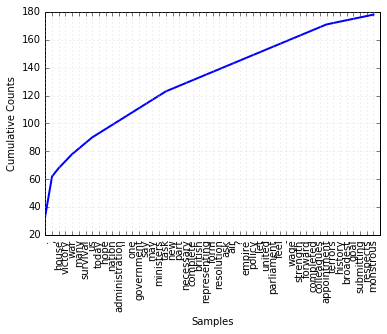

In [45]:
import matplotlib
%matplotlib inline

freq_dist_no_stop.plot(50, cumulative=True)

In [26]:
text.concordance('house')

Displaying 6 of 6 matches:
t to suggest to the speaker that the house should be summoned today . at the en
proceedings , the adjournment of the house will be proposed until may 21 with p
liest opportunity . i now invite the house by a resolution to record its approv
ment . the resolution : '' that this house welcomes the formation of a governme
 be pardoned if 1 do not address the house at any length today , and i hope tha
been necessary to act . i say to the house as i said to ministers who have join


In [27]:
text.concordance('victory')

Displaying 5 of 5 matches:
 ? i can answer in one word . it is victory . victory at all costs - victory in
nswer in one word . it is victory . victory at all costs - victory in spite of 
is victory . victory at all costs - victory in spite of all terrors - victory ,
- victory in spite of all terrors - victory , however long and hard the road ma
 hard the road may be , for without victory there is no survival . let that be 


In [34]:
len(sorted_vocab)/len(text)

0.330945558739255

In [14]:
text.collocations()

british empire; wage war


In [25]:
text.collocations(window_size=4)

many months; british empire; appointment ministers; form
administration; part task; wage war


In [17]:
text.concordance('british empire')

No matches


In [18]:
text.concordance('empire')

Displaying 2 of 2 matches:
lized . no survival for the british empire , no survival for all that the brit
o survival for all that the british empire has stood for , no survival for the


In [12]:
import pandas as pd

sent_id = 0
rows = []
for sentence in sentences:
    for word in word_tokenize(sentence):
        is_stop = word in stops
        values = {'word':word, 'sent_id':sent_id, 'is_stop':is_stop}
        rows.append(values)

speech = pd.DataFrame(rows)

In [13]:
speech

,is_stop,sent_id,word
0,True,0,on
1,False,0,friday
2,False,0,evening
3,False,0,last
4,True,0,i
5,False,0,received
6,True,0,from
7,True,0,his
8,False,0,majesty
9,True,0,the
